# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [55]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv("../data/states_edu.csv")
df.head(1)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [72]:
# clean up nan values
df = df.dropna()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [10]:
df["YEAR"].max() - df["YEAR"].min()

np.int64(33)

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [23]:
miDf = df[df["STATE"] == "Michigan".upper()]
ohDf = df[df["STATE"] == "ohio".upper()]
miDf["AVG_MATH_8_SCORE"].mean() > ohDf["AVG_MATH_8_SCORE"].mean()


np.False_

Find the average for your chosen test across all states in 2019

In [37]:
df19 = df[df["YEAR"]==2019]
df19["AVG_MATH_8_SCORE"].mean()

np.float64(281.2641509433962)

For each state, find a maximum value for your chosen test score

In [46]:
states = df["STATE"].unique()
for state in states:
    tmp = df[df["STATE"] == state]
    max = str(tmp["AVG_MATH_8_SCORE"].max())
    display(state + " max is " +  max)


'ALABAMA max is 269.0'

'ALASKA max is 283.0'

'ARIZONA max is 283.0'

'ARKANSAS max is 279.0'

'CALIFORNIA max is 277.0'

'COLORADO max is 292.0'

'CONNECTICUT max is 289.0'

'DELAWARE max is 284.0'

'DISTRICT_OF_COLUMBIA max is 269.0'

'FLORIDA max is 281.0'

'GEORGIA max is 281.0'

'HAWAII max is 281.0'

'IDAHO max is 287.0'

'ILLINOIS max is 285.0'

'INDIANA max is 288.0'

'IOWA max is 286.0'

'KANSAS max is 290.0'

'KENTUCKY max is 282.0'

'LOUISIANA max is 273.0'

'MAINE max is 289.0'

'MARYLAND max is 288.0'

'MASSACHUSETTS max is 301.0'

'MICHIGAN max is 280.0'

'MINNESOTA max is 295.0'

'MISSISSIPPI max is 274.0'

'MISSOURI max is 286.0'

'MONTANA max is 293.0'

'NEBRASKA max is 288.0'

'NEVADA max is 278.0'

'NEW_HAMPSHIRE max is 296.0'

'NEW_JERSEY max is 296.0'

'NEW_MEXICO max is 274.0'

'NEW_YORK max is 283.0'

'NORTH_CAROLINA max is 286.0'

'NORTH_DAKOTA max is 293.0'

'OHIO max is 290.0'

'OKLAHOMA max is 279.0'

'OREGON max is 285.0'

'PENNSYLVANIA max is 290.0'

'RHODE_ISLAND max is 284.0'

'SOUTH_CAROLINA max is 282.0'

'SOUTH_DAKOTA max is 291.0'

'TENNESSEE max is 280.0'

'TEXAS max is 290.0'

'UTAH max is 287.0'

'VERMONT max is 295.0'

'VIRGINIA max is 290.0'

'WASHINGTON max is 290.0'

'WEST_VIRGINIA max is 274.0'

'WISCONSIN max is 289.0'

'WYOMING max is 289.0'

'DODEA max is 293.0'

'NATIONAL max is 285.0'

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [62]:
df['REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL']

Feature engineering justification: **it is important to recognize the correlation between total revenue and student enrollment**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

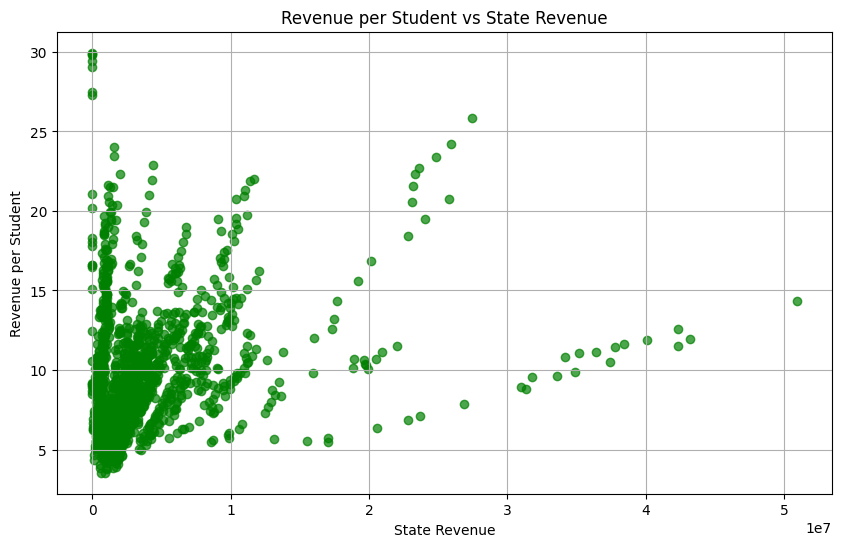

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(df['STATE_REVENUE'], df['REVENUE_PER_STUDENT'], alpha=0.7, color='g')
plt.title('Revenue per Student vs State Revenue')
plt.xlabel('State Revenue')
plt.ylabel('Revenue per Student')
plt.grid(True)
plt.show()

**higher state revenue indicates a higher overall revenue per student**

**Visualization 2**

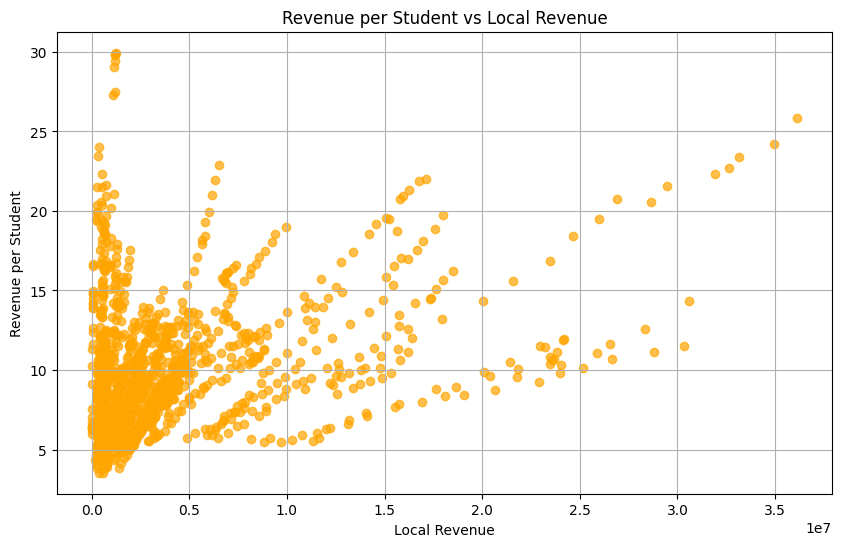

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(df['LOCAL_REVENUE'], df['REVENUE_PER_STUDENT'], alpha=0.7, color='orange')
plt.title('Revenue per Student vs Local Revenue')
plt.xlabel('Local Revenue')
plt.ylabel('Revenue per Student')
plt.grid(True)
plt.show()

**ditto**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = df[['STATE_REVENUE', 'LOCAL_REVENUE']]  # predictors
y = df['REVENUE_PER_STUDENT']  # response variable

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [69]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [79]:
# create your model here
model = LinearRegression()
 

In [80]:
model.fit(X_train, y_train)

LinearRegression()

In [81]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

display(f'Mean Squared Error: {mse}')
display(f'R-squared: {r2}')


'Mean Squared Error: 11.477755095228293'

'R-squared: -0.07344387817177389'

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

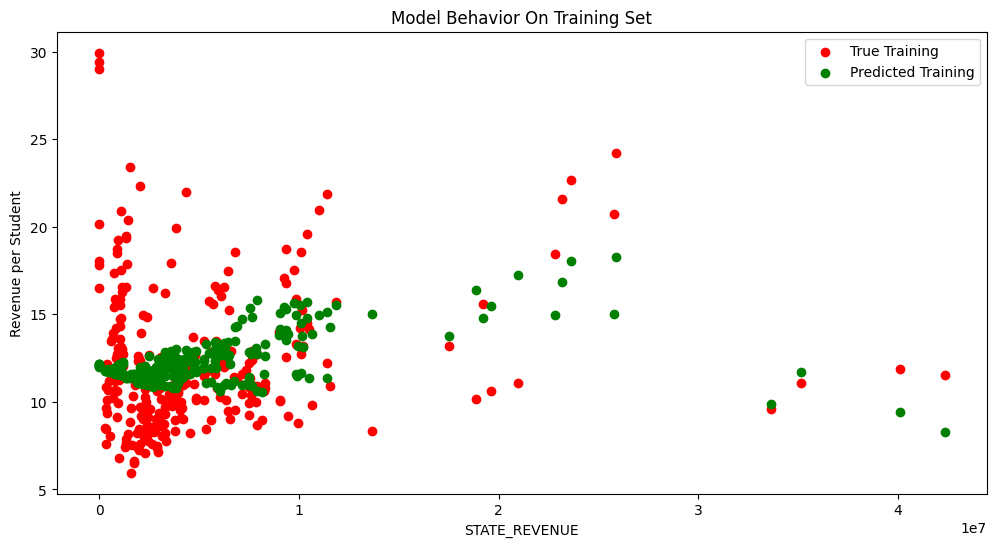

In [83]:
col_name = 'STATE_REVENUE'

# Visualize on the training set
f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color="red")
plt.scatter(X_train[col_name], model.predict(X_train), color="green")
plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Revenue per Student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

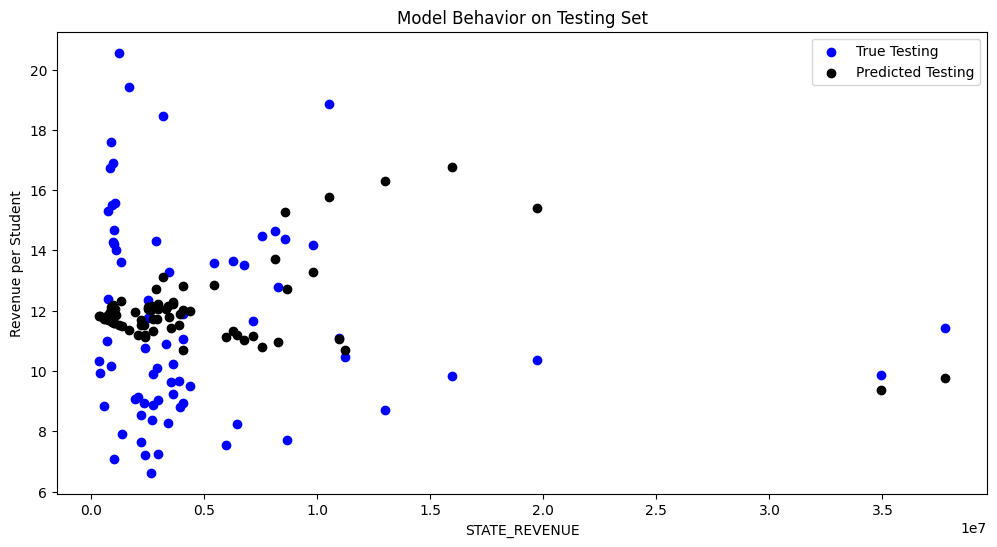

In [84]:
col_name = 'STATE_REVENUE'

# Visualize on the testing set
f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color="blue")
plt.scatter(X_test[col_name], model.predict(X_test), color="black")
plt.legend(['True Testing','Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('Revenue per Student')
plt.title("Model Behavior on Testing Set")
